## Part 2 c) Random Forest - OverSampling

#### 1. load clean data

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np

DATAFILE1 = 'D:\\Google One\\8. Library\\0. UTS\\Master of Information Technology\\4. Subjects\\2021 Semester 1\\32130 Fundamentals of Data Analystics\\4. Assignment\\Assignment 3\\Database\\A3_OverSample_train.csv'
a3train = pd.read_csv(DATAFILE1)
a3train = a3train[[col for col in a3train.columns if (col != 'Unnamed: 0' and col != 'Quote_Id')]]
a3train.head()

,Field_info2,Field_info4,Coverage_info1,Coverage_info2,Sales_info1,Sales_info2,Sales_info3,Sales_info5,Personal_info1,Personal_info2,...,Property_3_Q,Property_3_R,Property_3_S,Geo_5_CA,Geo_5_IL,Geo_5_NJ,Geo_5_TX,Quote_Year,Quote_Month,Quote_Flag
0,-1.244954,0,-0.896869,-3.910702,0,0.793684,-0.475199,0.573928,0,-0.134783,...,0,0,1,0,0,0,1,0.306811,-0.885036,0
1,0.240331,0,-0.179394,0.161749,1,-1.252022,0.954253,1.091226,0,-0.134783,...,0,0,1,0,1,0,0,0.306811,-1.476678,0
2,0.053995,0,-1.255606,0.161749,1,0.793684,1.113080,0.819487,0,-1.175365,...,0,0,0,1,0,0,0,-1.070547,0.594068,0
3,-1.385381,1,1.434923,0.161749,0,0.793684,-0.475199,-1.184536,0,-1.175365,...,0,0,1,0,0,0,1,1.684170,0.889889,0
4,0.053995,0,-0.717500,0.161749,1,0.793684,-1.110510,1.024008,0,0.013872,...,0,0,0,1,0,0,0,0.306811,-1.476678,0


#### 2. parameter optimization `GridSearchCV`

In [2]:
X_train, y_train = a3train.iloc[:,:-1], a3train.iloc[:,-1]

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

n_estimators = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
criterion = ['gini', 'entropy']
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
est_model = RandomForestClassifier()
random_grid = {'n_estimators':n_estimators,
               'criterion': criterion, 
                'min_samples_leaf': min_samples_leaf,
                }

cv_Gird = GridSearchCV(estimator = est_model, param_grid = random_grid, 
                       scoring = make_scorer(f1_score,pos_label=1), cv = 3, verbose = 2)
cv_Gird.fit(X_train, y_train)

Fitting 3 folds for each of 800 candidates, totalling 2400 fits
[CV] END .criterion=gini, min_samples_leaf=1, n_estimators=5; total time=   0.4s
[CV] END .criterion=gini, min_samples_leaf=1, n_estimators=5; total time=   0.4s
[CV] END .criterion=gini, min_samples_leaf=1, n_estimators=5; total time=   0.5s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=10; total time=   0.7s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=10; total time=   0.9s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=10; total time=   0.9s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=15; total time=   1.0s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=15; total time=   1.3s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=15; total time=   1.4s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=20; total time=   1.5s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=20; total time=   1.8s
[CV] END criterion=gini, min_samples_leaf=1, 

[CV] END criterion=gini, min_samples_leaf=2, n_estimators=70; total time=   6.4s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=75; total time=   5.8s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=75; total time=   6.6s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=75; total time=   6.9s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=80; total time=   6.4s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=80; total time=   7.4s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=80; total time=   7.3s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=85; total time=   6.8s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=85; total time=   7.9s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=85; total time=   8.1s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=90; total time=   7.1s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=90; total time=   8.2s
[CV] END criterion=gini, min

[CV] END criterion=gini, min_samples_leaf=4, n_estimators=40; total time=   3.2s
[CV] END criterion=gini, min_samples_leaf=4, n_estimators=45; total time=   3.5s
[CV] END criterion=gini, min_samples_leaf=4, n_estimators=45; total time=   3.8s
[CV] END criterion=gini, min_samples_leaf=4, n_estimators=45; total time=   3.6s
[CV] END criterion=gini, min_samples_leaf=4, n_estimators=50; total time=   3.7s
[CV] END criterion=gini, min_samples_leaf=4, n_estimators=50; total time=   4.2s
[CV] END criterion=gini, min_samples_leaf=4, n_estimators=50; total time=   4.2s
[CV] END criterion=gini, min_samples_leaf=4, n_estimators=55; total time=   4.4s
[CV] END criterion=gini, min_samples_leaf=4, n_estimators=55; total time=   5.0s
[CV] END criterion=gini, min_samples_leaf=4, n_estimators=55; total time=   4.8s
[CV] END criterion=gini, min_samples_leaf=4, n_estimators=60; total time=   4.8s
[CV] END criterion=gini, min_samples_leaf=4, n_estimators=60; total time=   5.0s
[CV] END criterion=gini, min

[CV] END criterion=gini, min_samples_leaf=6, n_estimators=10; total time=   0.8s
[CV] END criterion=gini, min_samples_leaf=6, n_estimators=15; total time=   1.1s
[CV] END criterion=gini, min_samples_leaf=6, n_estimators=15; total time=   1.1s
[CV] END criterion=gini, min_samples_leaf=6, n_estimators=15; total time=   1.2s
[CV] END criterion=gini, min_samples_leaf=6, n_estimators=20; total time=   1.4s
[CV] END criterion=gini, min_samples_leaf=6, n_estimators=20; total time=   1.6s
[CV] END criterion=gini, min_samples_leaf=6, n_estimators=20; total time=   1.7s
[CV] END criterion=gini, min_samples_leaf=6, n_estimators=25; total time=   1.7s
[CV] END criterion=gini, min_samples_leaf=6, n_estimators=25; total time=   1.9s
[CV] END criterion=gini, min_samples_leaf=6, n_estimators=25; total time=   2.3s
[CV] END criterion=gini, min_samples_leaf=6, n_estimators=30; total time=   2.1s
[CV] END criterion=gini, min_samples_leaf=6, n_estimators=30; total time=   2.3s
[CV] END criterion=gini, min

[CV] END criterion=gini, min_samples_leaf=7, n_estimators=80; total time=   6.2s
[CV] END criterion=gini, min_samples_leaf=7, n_estimators=85; total time=   5.9s
[CV] END criterion=gini, min_samples_leaf=7, n_estimators=85; total time=   6.4s
[CV] END criterion=gini, min_samples_leaf=7, n_estimators=85; total time=   6.7s
[CV] END criterion=gini, min_samples_leaf=7, n_estimators=90; total time=   6.9s
[CV] END criterion=gini, min_samples_leaf=7, n_estimators=90; total time=   8.2s
[CV] END criterion=gini, min_samples_leaf=7, n_estimators=90; total time=   7.1s
[CV] END criterion=gini, min_samples_leaf=7, n_estimators=95; total time=   6.6s
[CV] END criterion=gini, min_samples_leaf=7, n_estimators=95; total time=   7.4s
[CV] END criterion=gini, min_samples_leaf=7, n_estimators=95; total time=   7.8s
[CV] END criterion=gini, min_samples_leaf=7, n_estimators=100; total time=   7.0s
[CV] END criterion=gini, min_samples_leaf=7, n_estimators=100; total time=   8.0s
[CV] END criterion=gini, m

[CV] END criterion=gini, min_samples_leaf=9, n_estimators=50; total time=   3.8s
[CV] END criterion=gini, min_samples_leaf=9, n_estimators=55; total time=   3.9s
[CV] END criterion=gini, min_samples_leaf=9, n_estimators=55; total time=   4.1s
[CV] END criterion=gini, min_samples_leaf=9, n_estimators=55; total time=   4.3s
[CV] END criterion=gini, min_samples_leaf=9, n_estimators=60; total time=   4.1s
[CV] END criterion=gini, min_samples_leaf=9, n_estimators=60; total time=   4.5s
[CV] END criterion=gini, min_samples_leaf=9, n_estimators=60; total time=   4.5s
[CV] END criterion=gini, min_samples_leaf=9, n_estimators=65; total time=   4.8s
[CV] END criterion=gini, min_samples_leaf=9, n_estimators=65; total time=   5.3s
[CV] END criterion=gini, min_samples_leaf=9, n_estimators=65; total time=   4.9s
[CV] END criterion=gini, min_samples_leaf=9, n_estimators=70; total time=   5.1s
[CV] END criterion=gini, min_samples_leaf=9, n_estimators=70; total time=   5.1s
[CV] END criterion=gini, min

[CV] END criterion=gini, min_samples_leaf=11, n_estimators=20; total time=   1.4s
[CV] END criterion=gini, min_samples_leaf=11, n_estimators=20; total time=   1.4s
[CV] END criterion=gini, min_samples_leaf=11, n_estimators=25; total time=   1.6s
[CV] END criterion=gini, min_samples_leaf=11, n_estimators=25; total time=   1.8s
[CV] END criterion=gini, min_samples_leaf=11, n_estimators=25; total time=   1.9s
[CV] END criterion=gini, min_samples_leaf=11, n_estimators=30; total time=   2.0s
[CV] END criterion=gini, min_samples_leaf=11, n_estimators=30; total time=   2.1s
[CV] END criterion=gini, min_samples_leaf=11, n_estimators=30; total time=   2.1s
[CV] END criterion=gini, min_samples_leaf=11, n_estimators=35; total time=   2.3s
[CV] END criterion=gini, min_samples_leaf=11, n_estimators=35; total time=   2.4s
[CV] END criterion=gini, min_samples_leaf=11, n_estimators=35; total time=   2.6s
[CV] END criterion=gini, min_samples_leaf=11, n_estimators=40; total time=   2.9s
[CV] END criteri

[CV] END criterion=gini, min_samples_leaf=12, n_estimators=85; total time=   6.0s
[CV] END criterion=gini, min_samples_leaf=12, n_estimators=90; total time=   6.1s
[CV] END criterion=gini, min_samples_leaf=12, n_estimators=90; total time=   6.3s
[CV] END criterion=gini, min_samples_leaf=12, n_estimators=90; total time=   6.4s
[CV] END criterion=gini, min_samples_leaf=12, n_estimators=95; total time=   6.6s
[CV] END criterion=gini, min_samples_leaf=12, n_estimators=95; total time=   6.6s
[CV] END criterion=gini, min_samples_leaf=12, n_estimators=95; total time=   7.1s
[CV] END criterion=gini, min_samples_leaf=12, n_estimators=100; total time=   6.9s
[CV] END criterion=gini, min_samples_leaf=12, n_estimators=100; total time=   7.3s
[CV] END criterion=gini, min_samples_leaf=12, n_estimators=100; total time=   7.1s
[CV] END criterion=gini, min_samples_leaf=13, n_estimators=5; total time=   0.3s
[CV] END criterion=gini, min_samples_leaf=13, n_estimators=5; total time=   0.4s
[CV] END criter

[CV] END criterion=gini, min_samples_leaf=14, n_estimators=55; total time=   3.6s
[CV] END criterion=gini, min_samples_leaf=14, n_estimators=55; total time=   4.0s
[CV] END criterion=gini, min_samples_leaf=14, n_estimators=55; total time=   3.8s
[CV] END criterion=gini, min_samples_leaf=14, n_estimators=60; total time=   3.9s
[CV] END criterion=gini, min_samples_leaf=14, n_estimators=60; total time=   4.3s
[CV] END criterion=gini, min_samples_leaf=14, n_estimators=60; total time=   4.3s
[CV] END criterion=gini, min_samples_leaf=14, n_estimators=65; total time=   4.5s
[CV] END criterion=gini, min_samples_leaf=14, n_estimators=65; total time=   5.4s
[CV] END criterion=gini, min_samples_leaf=14, n_estimators=65; total time=   6.0s
[CV] END criterion=gini, min_samples_leaf=14, n_estimators=70; total time=   5.0s
[CV] END criterion=gini, min_samples_leaf=14, n_estimators=70; total time=   4.9s
[CV] END criterion=gini, min_samples_leaf=14, n_estimators=70; total time=   6.8s
[CV] END criteri

[CV] END criterion=gini, min_samples_leaf=16, n_estimators=20; total time=   1.8s
[CV] END criterion=gini, min_samples_leaf=16, n_estimators=20; total time=   1.8s
[CV] END criterion=gini, min_samples_leaf=16, n_estimators=25; total time=   1.8s
[CV] END criterion=gini, min_samples_leaf=16, n_estimators=25; total time=   1.9s
[CV] END criterion=gini, min_samples_leaf=16, n_estimators=25; total time=   1.8s
[CV] END criterion=gini, min_samples_leaf=16, n_estimators=30; total time=   2.0s
[CV] END criterion=gini, min_samples_leaf=16, n_estimators=30; total time=   2.2s
[CV] END criterion=gini, min_samples_leaf=16, n_estimators=30; total time=   2.3s
[CV] END criterion=gini, min_samples_leaf=16, n_estimators=35; total time=   2.4s
[CV] END criterion=gini, min_samples_leaf=16, n_estimators=35; total time=   2.6s
[CV] END criterion=gini, min_samples_leaf=16, n_estimators=35; total time=   2.6s
[CV] END criterion=gini, min_samples_leaf=16, n_estimators=40; total time=   2.7s
[CV] END criteri

[CV] END criterion=gini, min_samples_leaf=17, n_estimators=85; total time=   5.9s
[CV] END criterion=gini, min_samples_leaf=17, n_estimators=90; total time=   5.7s
[CV] END criterion=gini, min_samples_leaf=17, n_estimators=90; total time=   5.7s
[CV] END criterion=gini, min_samples_leaf=17, n_estimators=90; total time=   5.7s
[CV] END criterion=gini, min_samples_leaf=17, n_estimators=95; total time=   5.9s
[CV] END criterion=gini, min_samples_leaf=17, n_estimators=95; total time=   6.0s
[CV] END criterion=gini, min_samples_leaf=17, n_estimators=95; total time=   6.4s
[CV] END criterion=gini, min_samples_leaf=17, n_estimators=100; total time=   6.2s
[CV] END criterion=gini, min_samples_leaf=17, n_estimators=100; total time=   6.4s
[CV] END criterion=gini, min_samples_leaf=17, n_estimators=100; total time=   6.6s
[CV] END criterion=gini, min_samples_leaf=18, n_estimators=5; total time=   0.3s
[CV] END criterion=gini, min_samples_leaf=18, n_estimators=5; total time=   0.3s
[CV] END criter

[CV] END criterion=gini, min_samples_leaf=19, n_estimators=55; total time=   3.4s
[CV] END criterion=gini, min_samples_leaf=19, n_estimators=55; total time=   3.5s
[CV] END criterion=gini, min_samples_leaf=19, n_estimators=55; total time=   3.5s
[CV] END criterion=gini, min_samples_leaf=19, n_estimators=60; total time=   3.6s
[CV] END criterion=gini, min_samples_leaf=19, n_estimators=60; total time=   3.8s
[CV] END criterion=gini, min_samples_leaf=19, n_estimators=60; total time=   3.9s
[CV] END criterion=gini, min_samples_leaf=19, n_estimators=65; total time=   4.0s
[CV] END criterion=gini, min_samples_leaf=19, n_estimators=65; total time=   4.1s
[CV] END criterion=gini, min_samples_leaf=19, n_estimators=65; total time=   4.1s
[CV] END criterion=gini, min_samples_leaf=19, n_estimators=70; total time=   4.2s
[CV] END criterion=gini, min_samples_leaf=19, n_estimators=70; total time=   4.4s
[CV] END criterion=gini, min_samples_leaf=19, n_estimators=70; total time=   4.4s
[CV] END criteri

[CV] END criterion=entropy, min_samples_leaf=1, n_estimators=20; total time=   2.0s
[CV] END criterion=entropy, min_samples_leaf=1, n_estimators=20; total time=   2.0s
[CV] END criterion=entropy, min_samples_leaf=1, n_estimators=25; total time=   2.1s
[CV] END criterion=entropy, min_samples_leaf=1, n_estimators=25; total time=   2.7s
[CV] END criterion=entropy, min_samples_leaf=1, n_estimators=25; total time=   2.5s
[CV] END criterion=entropy, min_samples_leaf=1, n_estimators=30; total time=   2.5s
[CV] END criterion=entropy, min_samples_leaf=1, n_estimators=30; total time=   3.1s
[CV] END criterion=entropy, min_samples_leaf=1, n_estimators=30; total time=   3.1s
[CV] END criterion=entropy, min_samples_leaf=1, n_estimators=35; total time=   3.0s
[CV] END criterion=entropy, min_samples_leaf=1, n_estimators=35; total time=   3.6s
[CV] END criterion=entropy, min_samples_leaf=1, n_estimators=35; total time=   3.5s
[CV] END criterion=entropy, min_samples_leaf=1, n_estimators=40; total time=

[CV] END criterion=entropy, min_samples_leaf=2, n_estimators=85; total time=   6.1s
[CV] END criterion=entropy, min_samples_leaf=2, n_estimators=85; total time=   7.2s
[CV] END criterion=entropy, min_samples_leaf=2, n_estimators=85; total time=   7.0s
[CV] END criterion=entropy, min_samples_leaf=2, n_estimators=90; total time=   6.4s
[CV] END criterion=entropy, min_samples_leaf=2, n_estimators=90; total time=   7.5s
[CV] END criterion=entropy, min_samples_leaf=2, n_estimators=90; total time=   7.3s
[CV] END criterion=entropy, min_samples_leaf=2, n_estimators=95; total time=   6.7s
[CV] END criterion=entropy, min_samples_leaf=2, n_estimators=95; total time=   7.7s
[CV] END criterion=entropy, min_samples_leaf=2, n_estimators=95; total time=   7.7s
[CV] END criterion=entropy, min_samples_leaf=2, n_estimators=100; total time=   7.3s
[CV] END criterion=entropy, min_samples_leaf=2, n_estimators=100; total time=   8.1s
[CV] END criterion=entropy, min_samples_leaf=2, n_estimators=100; total ti

[CV] END criterion=entropy, min_samples_leaf=4, n_estimators=45; total time=   3.3s
[CV] END criterion=entropy, min_samples_leaf=4, n_estimators=50; total time=   3.5s
[CV] END criterion=entropy, min_samples_leaf=4, n_estimators=50; total time=   3.7s
[CV] END criterion=entropy, min_samples_leaf=4, n_estimators=50; total time=   3.7s
[CV] END criterion=entropy, min_samples_leaf=4, n_estimators=55; total time=   3.8s
[CV] END criterion=entropy, min_samples_leaf=4, n_estimators=55; total time=   4.3s
[CV] END criterion=entropy, min_samples_leaf=4, n_estimators=55; total time=   4.3s
[CV] END criterion=entropy, min_samples_leaf=4, n_estimators=60; total time=   4.1s
[CV] END criterion=entropy, min_samples_leaf=4, n_estimators=60; total time=   4.8s
[CV] END criterion=entropy, min_samples_leaf=4, n_estimators=60; total time=   4.5s
[CV] END criterion=entropy, min_samples_leaf=4, n_estimators=65; total time=   4.5s
[CV] END criterion=entropy, min_samples_leaf=4, n_estimators=65; total time=

[CV] END criterion=entropy, min_samples_leaf=6, n_estimators=10; total time=   0.7s
[CV] END criterion=entropy, min_samples_leaf=6, n_estimators=10; total time=   0.8s
[CV] END criterion=entropy, min_samples_leaf=6, n_estimators=15; total time=   1.1s
[CV] END criterion=entropy, min_samples_leaf=6, n_estimators=15; total time=   1.1s
[CV] END criterion=entropy, min_samples_leaf=6, n_estimators=15; total time=   1.1s
[CV] END criterion=entropy, min_samples_leaf=6, n_estimators=20; total time=   1.4s
[CV] END criterion=entropy, min_samples_leaf=6, n_estimators=20; total time=   1.5s
[CV] END criterion=entropy, min_samples_leaf=6, n_estimators=20; total time=   1.5s
[CV] END criterion=entropy, min_samples_leaf=6, n_estimators=25; total time=   1.7s
[CV] END criterion=entropy, min_samples_leaf=6, n_estimators=25; total time=   1.8s
[CV] END criterion=entropy, min_samples_leaf=6, n_estimators=25; total time=   1.8s
[CV] END criterion=entropy, min_samples_leaf=6, n_estimators=30; total time=

[CV] END criterion=entropy, min_samples_leaf=7, n_estimators=75; total time=   5.2s
[CV] END criterion=entropy, min_samples_leaf=7, n_estimators=75; total time=   5.6s
[CV] END criterion=entropy, min_samples_leaf=7, n_estimators=75; total time=   5.6s
[CV] END criterion=entropy, min_samples_leaf=7, n_estimators=80; total time=   5.7s
[CV] END criterion=entropy, min_samples_leaf=7, n_estimators=80; total time=   6.2s
[CV] END criterion=entropy, min_samples_leaf=7, n_estimators=80; total time=   6.2s
[CV] END criterion=entropy, min_samples_leaf=7, n_estimators=85; total time=   6.4s
[CV] END criterion=entropy, min_samples_leaf=7, n_estimators=85; total time=   6.3s
[CV] END criterion=entropy, min_samples_leaf=7, n_estimators=85; total time=   6.3s
[CV] END criterion=entropy, min_samples_leaf=7, n_estimators=90; total time=   6.3s
[CV] END criterion=entropy, min_samples_leaf=7, n_estimators=90; total time=   6.7s
[CV] END criterion=entropy, min_samples_leaf=7, n_estimators=90; total time=

[CV] END criterion=entropy, min_samples_leaf=9, n_estimators=35; total time=   2.5s
[CV] END criterion=entropy, min_samples_leaf=9, n_estimators=40; total time=   2.8s
[CV] END criterion=entropy, min_samples_leaf=9, n_estimators=40; total time=   3.0s
[CV] END criterion=entropy, min_samples_leaf=9, n_estimators=40; total time=   4.3s
[CV] END criterion=entropy, min_samples_leaf=9, n_estimators=45; total time=   3.4s
[CV] END criterion=entropy, min_samples_leaf=9, n_estimators=45; total time=   3.3s
[CV] END criterion=entropy, min_samples_leaf=9, n_estimators=45; total time=   3.4s
[CV] END criterion=entropy, min_samples_leaf=9, n_estimators=50; total time=   3.9s
[CV] END criterion=entropy, min_samples_leaf=9, n_estimators=50; total time=   3.9s
[CV] END criterion=entropy, min_samples_leaf=9, n_estimators=50; total time=   3.8s
[CV] END criterion=entropy, min_samples_leaf=9, n_estimators=55; total time=   5.1s
[CV] END criterion=entropy, min_samples_leaf=9, n_estimators=55; total time=

[CV] END criterion=entropy, min_samples_leaf=10, n_estimators=100; total time=   6.7s
[CV] END criterion=entropy, min_samples_leaf=10, n_estimators=100; total time=   7.0s
[CV] END criterion=entropy, min_samples_leaf=10, n_estimators=100; total time=   6.8s
[CV] END criterion=entropy, min_samples_leaf=11, n_estimators=5; total time=   0.3s
[CV] END criterion=entropy, min_samples_leaf=11, n_estimators=5; total time=   0.4s
[CV] END criterion=entropy, min_samples_leaf=11, n_estimators=5; total time=   0.4s
[CV] END criterion=entropy, min_samples_leaf=11, n_estimators=10; total time=   0.7s
[CV] END criterion=entropy, min_samples_leaf=11, n_estimators=10; total time=   0.7s
[CV] END criterion=entropy, min_samples_leaf=11, n_estimators=10; total time=   0.7s
[CV] END criterion=entropy, min_samples_leaf=11, n_estimators=15; total time=   1.0s
[CV] END criterion=entropy, min_samples_leaf=11, n_estimators=15; total time=   1.1s
[CV] END criterion=entropy, min_samples_leaf=11, n_estimators=15;

[CV] END criterion=entropy, min_samples_leaf=12, n_estimators=60; total time=   4.4s
[CV] END criterion=entropy, min_samples_leaf=12, n_estimators=60; total time=   4.4s
[CV] END criterion=entropy, min_samples_leaf=12, n_estimators=65; total time=   4.6s
[CV] END criterion=entropy, min_samples_leaf=12, n_estimators=65; total time=   4.4s
[CV] END criterion=entropy, min_samples_leaf=12, n_estimators=65; total time=   4.4s
[CV] END criterion=entropy, min_samples_leaf=12, n_estimators=70; total time=   4.5s
[CV] END criterion=entropy, min_samples_leaf=12, n_estimators=70; total time=   4.9s
[CV] END criterion=entropy, min_samples_leaf=12, n_estimators=70; total time=   4.8s
[CV] END criterion=entropy, min_samples_leaf=12, n_estimators=75; total time=   5.1s
[CV] END criterion=entropy, min_samples_leaf=12, n_estimators=75; total time=   5.2s
[CV] END criterion=entropy, min_samples_leaf=12, n_estimators=75; total time=   5.3s
[CV] END criterion=entropy, min_samples_leaf=12, n_estimators=80;

[CV] END criterion=entropy, min_samples_leaf=14, n_estimators=20; total time=   1.3s
[CV] END criterion=entropy, min_samples_leaf=14, n_estimators=25; total time=   1.7s
[CV] END criterion=entropy, min_samples_leaf=14, n_estimators=25; total time=   1.7s
[CV] END criterion=entropy, min_samples_leaf=14, n_estimators=25; total time=   1.7s
[CV] END criterion=entropy, min_samples_leaf=14, n_estimators=30; total time=   2.2s
[CV] END criterion=entropy, min_samples_leaf=14, n_estimators=30; total time=   1.9s
[CV] END criterion=entropy, min_samples_leaf=14, n_estimators=30; total time=   2.2s
[CV] END criterion=entropy, min_samples_leaf=14, n_estimators=35; total time=   2.4s
[CV] END criterion=entropy, min_samples_leaf=14, n_estimators=35; total time=   2.3s
[CV] END criterion=entropy, min_samples_leaf=14, n_estimators=35; total time=   2.3s
[CV] END criterion=entropy, min_samples_leaf=14, n_estimators=40; total time=   2.9s
[CV] END criterion=entropy, min_samples_leaf=14, n_estimators=40;

[CV] END criterion=entropy, min_samples_leaf=15, n_estimators=85; total time=   5.6s
[CV] END criterion=entropy, min_samples_leaf=15, n_estimators=85; total time=   5.6s
[CV] END criterion=entropy, min_samples_leaf=15, n_estimators=85; total time=   5.6s
[CV] END criterion=entropy, min_samples_leaf=15, n_estimators=90; total time=   6.1s
[CV] END criterion=entropy, min_samples_leaf=15, n_estimators=90; total time=   6.1s
[CV] END criterion=entropy, min_samples_leaf=15, n_estimators=90; total time=   5.9s
[CV] END criterion=entropy, min_samples_leaf=15, n_estimators=95; total time=   6.2s
[CV] END criterion=entropy, min_samples_leaf=15, n_estimators=95; total time=   6.1s
[CV] END criterion=entropy, min_samples_leaf=15, n_estimators=95; total time=   6.4s
[CV] END criterion=entropy, min_samples_leaf=15, n_estimators=100; total time=   7.0s
[CV] END criterion=entropy, min_samples_leaf=15, n_estimators=100; total time=   7.4s
[CV] END criterion=entropy, min_samples_leaf=15, n_estimators=1

[CV] END criterion=entropy, min_samples_leaf=17, n_estimators=45; total time=   3.0s
[CV] END criterion=entropy, min_samples_leaf=17, n_estimators=45; total time=   2.9s
[CV] END criterion=entropy, min_samples_leaf=17, n_estimators=50; total time=   3.3s
[CV] END criterion=entropy, min_samples_leaf=17, n_estimators=50; total time=   3.3s
[CV] END criterion=entropy, min_samples_leaf=17, n_estimators=50; total time=   3.3s
[CV] END criterion=entropy, min_samples_leaf=17, n_estimators=55; total time=   3.7s
[CV] END criterion=entropy, min_samples_leaf=17, n_estimators=55; total time=   3.7s
[CV] END criterion=entropy, min_samples_leaf=17, n_estimators=55; total time=   3.6s
[CV] END criterion=entropy, min_samples_leaf=17, n_estimators=60; total time=   3.8s
[CV] END criterion=entropy, min_samples_leaf=17, n_estimators=60; total time=   4.1s
[CV] END criterion=entropy, min_samples_leaf=17, n_estimators=60; total time=   3.8s
[CV] END criterion=entropy, min_samples_leaf=17, n_estimators=65;

[CV] END criterion=entropy, min_samples_leaf=19, n_estimators=5; total time=   0.4s
[CV] END criterion=entropy, min_samples_leaf=19, n_estimators=10; total time=   0.7s
[CV] END criterion=entropy, min_samples_leaf=19, n_estimators=10; total time=   0.7s
[CV] END criterion=entropy, min_samples_leaf=19, n_estimators=10; total time=   0.7s
[CV] END criterion=entropy, min_samples_leaf=19, n_estimators=15; total time=   1.0s
[CV] END criterion=entropy, min_samples_leaf=19, n_estimators=15; total time=   1.0s
[CV] END criterion=entropy, min_samples_leaf=19, n_estimators=15; total time=   1.2s
[CV] END criterion=entropy, min_samples_leaf=19, n_estimators=20; total time=   1.7s
[CV] END criterion=entropy, min_samples_leaf=19, n_estimators=20; total time=   1.5s
[CV] END criterion=entropy, min_samples_leaf=19, n_estimators=20; total time=   1.7s
[CV] END criterion=entropy, min_samples_leaf=19, n_estimators=25; total time=   2.0s
[CV] END criterion=entropy, min_samples_leaf=19, n_estimators=25; 

[CV] END criterion=entropy, min_samples_leaf=20, n_estimators=70; total time=   4.9s
[CV] END criterion=entropy, min_samples_leaf=20, n_estimators=70; total time=   5.0s
[CV] END criterion=entropy, min_samples_leaf=20, n_estimators=70; total time=   5.3s
[CV] END criterion=entropy, min_samples_leaf=20, n_estimators=75; total time=   5.4s
[CV] END criterion=entropy, min_samples_leaf=20, n_estimators=75; total time=   5.3s
[CV] END criterion=entropy, min_samples_leaf=20, n_estimators=75; total time=   5.1s
[CV] END criterion=entropy, min_samples_leaf=20, n_estimators=80; total time=   6.4s
[CV] END criterion=entropy, min_samples_leaf=20, n_estimators=80; total time=   7.4s
[CV] END criterion=entropy, min_samples_leaf=20, n_estimators=80; total time=   7.0s
[CV] END criterion=entropy, min_samples_leaf=20, n_estimators=85; total time=   6.3s
[CV] END criterion=entropy, min_samples_leaf=20, n_estimators=85; total time=   6.7s
[CV] END criterion=entropy, min_samples_leaf=20, n_estimators=85;

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95,
                                          100]},
             scoring=make_scorer(f1_score, pos_label=1), verbose=2)

In [4]:
print(cv_Gird.best_params_)
print(cv_Gird.best_score_)

{'criterion': 'gini', 'min_samples_leaf': 15, 'n_estimators': 5}
0.8076470673322427


#### 3. build classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 5, criterion = 'gini', min_samples_leaf= 15)
clf.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=15, n_estimators=5)

#### 4. generate `f1-score` for evaluation

In [6]:
# import test set and fit in to classifier
DATAFILE2 = 'D:\\Google One\\8. Library\\0. UTS\\Master of Information Technology\\4. Subjects\\2021 Semester 1\\32130 Fundamentals of Data Analystics\\4. Assignment\\Assignment 3\\Database\\A3_test.csv'
a3test = pd.read_csv(DATAFILE2)
a3test = a3test[[col for col in a3test.columns if (col != 'Unnamed: 0' and col != 'Quote_Id')]]

X_test, y_test = a3test.iloc[:,:-1], a3test.iloc[:,-1]
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     12629
           1       0.57      0.55      0.56      3006

    accuracy                           0.83     15635
   macro avg       0.73      0.72      0.73     15635
weighted avg       0.83      0.83      0.83     15635

The F1-score for Quote_Flag = 1 is 0.5581
[[11372  1257]
 [ 1356  1650]]


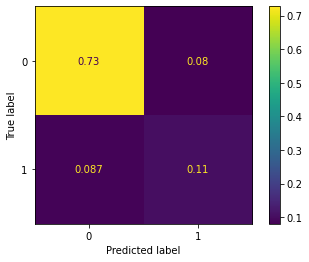

In [7]:
# generate reposrting score

from sklearn.metrics import f1_score, classification_report, confusion_matrix,plot_confusion_matrix
# Classification Report and f1-score
print(classification_report(y_test, y_pred))
print('The F1-score for Quote_Flag = 1 is {:.4f}'.format(f1_score(y_test, y_pred, pos_label=1)))
# Confusion Matrix
mat = confusion_matrix(y_test, y_pred)
print(mat)
plot_confusion_matrix(clf, X_test, y_test, normalize = 'all');


### AUC for kaggle
To save time, AUC performance needs to be checked before use to predict for kaggle.
Only AUC > 0.85 worth for kaggle

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
# auc
y_probs_class_1 = y_probs[:,1]
auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc))

The AUC is 0.862


In [9]:
# import the unknown data and fit in the classifier for prediction

DATAFILE3 = 'C:\\Users\\ASUS\\32130_FDA_a3\\Kaggle\\a3k-clean_m.csv'
a3kaggle = pd.read_csv(DATAFILE3)
a3kaggle1 = a3kaggle[[col for col in a3kaggle.columns if col != 'Unnamed: 0' and col != 'Quote_Id']]

y_pred_K = clf.predict(a3kaggle1)

In [10]:
dummy_list = []
for i in y_pred_K:
    dummy_list = np.append(dummy_list, i)

data = {
    'Quote_Id': a3kaggle['Quote_Id'],
    'Quote_Flag': dummy_list
    }
df = pd.DataFrame(data)

In [31]:
df.head()

,Quote_Id,Quote_Flag
0,1,0.0
1,4,0.0
2,5,0.0
3,7,0.0
4,8,0.0


In [11]:
df.to_csv('C:\\Users\\ASUS\\32130_FDA_a3\\Kaggle\\UTS_32130_10620084.csv')